In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
dataInicial = '01/01/1995'
dataFinal = '30/06/2025'

url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}'

response = requests.get(url)
dados = response.json()

df = pd.DataFrame(dados)

# df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
# df['data'] = df['data'].dt.strftime('%d-%m-%Y')

df['mes_ano'] = df['data'].map(lambda x: x[3:10].replace('/', '-'))

df['valor'] = df['valor'].astype(float)

df = df.rename(columns= {'valor': 'ipca'})

###################

# # cria coluna com fator: (x/100 + 1)
# df['fator'] = df['ipca'] / 100 + 1

# # cria y pela multiplicação acumulada
# df['fator_acum'] = df['fator'].cumprod()

# df['ipca_acum'] = (df['fator_acum'] - 1)

###################

col_fator = df['ipca']

###################

max_shifts = len(df) - 1

counter = 0

for k in range(0, max_shifts + 1):

    x = col_fator.copy()

    x = x.iloc[counter:]    
    
    nome = str(df.loc[k, 'mes_ano'])    

    df[nome] = (x / 100 + 1).cumprod()

    counter += 1

display(df)

########################################

df_acum = df.tail(1).iloc[:, 3:]

df_acum  = df_acum.T.reset_index()
df_acum .columns = ['mes_ano', 'ipca_acumulado']

display(df_acum)

,data,ipca,mes_ano,01-1995,02-1995,03-1995,04-1995,05-1995,06-1995,07-1995,...,09-2024,10-2024,11-2024,12-2024,01-2025,02-2025,03-2025,04-2025,05-2025,06-2025
0,01/01/1995,1.70,01-1995,1.017000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/02/1995,1.02,02-1995,1.027373,1.010200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/1995,1.55,03-1995,1.043298,1.025858,1.015500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/04/1995,2.43,04-1995,1.068650,1.050786,1.040177,1.024300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/05/1995,2.67,05-1995,1.097183,1.078842,1.067949,1.051649,1.026700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,01/02/2025,1.31,02-2025,7.088469,6.969979,6.899603,6.794291,6.633107,6.460609,6.317826,...,1.034240,1.029710,1.023975,1.019998,1.014721,1.013100,NaN,NaN,NaN,NaN
362,01/03/2025,0.56,03-2025,7.128164,7.009011,6.938241,6.832339,6.670252,6.496788,6.353206,...,1.040032,1.035476,1.029710,1.025709,1.020403,1.018773,1.005600,NaN,NaN,NaN
363,01/04/2025,0.43,04-2025,7.158815,7.039150,6.968075,6.861719,6.698934,6.524724,6.380524,...,1.044504,1.039929,1.034138,1.030120,1.024791,1.023154,1.009924,1.004300,NaN,NaN
364,01/05/2025,0.26,05-2025,7.177428,7.057451,6.986192,6.879559,6.716352,6.541689,6.397114,...,1.047220,1.042632,1.036826,1.032798,1.027456,1.025814,1.012550,1.006911,1.002600,NaN


,mes_ano,ipca_acumulado
0,01-1995,7.194654
1,02-1995,7.074389
2,03-1995,7.002959
3,04-1995,6.896070
4,05-1995,6.732471
...,...,...
361,02-2025,1.028276
362,03-2025,1.014980
363,04-2025,1.009328
364,05-2025,1.005006


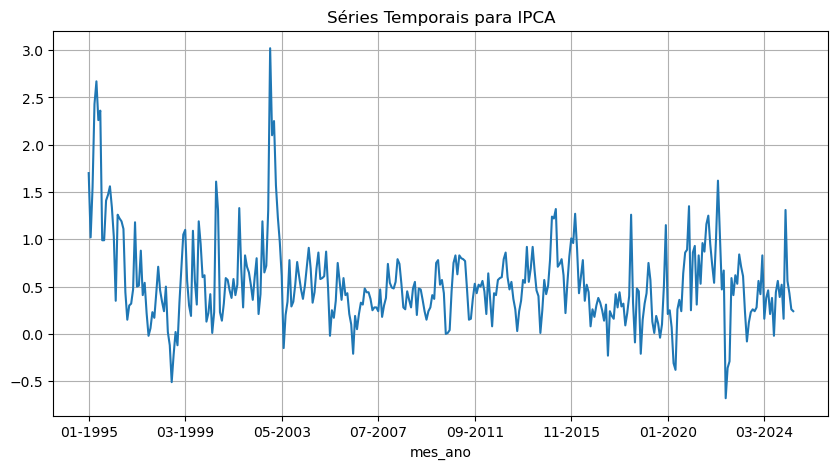

In [ ]:
df_plot_ipca = df.copy()

df_plot_ipca = df_plot_ipca.set_index('mes_ano')

df_plot_ipca['ipca'].plot(title='Série Temporal para IPCA', figsize=(10, 5))
plt.grid(True)
plt.show()

,01-1995
mes_ano,
01-1995,1.700000
02-1995,2.737340
03-1995,4.329769
04-1995,6.864982
05-1995,9.718277
...,...
02-2025,608.846855
03-2025,612.816398
04-2025,615.881508


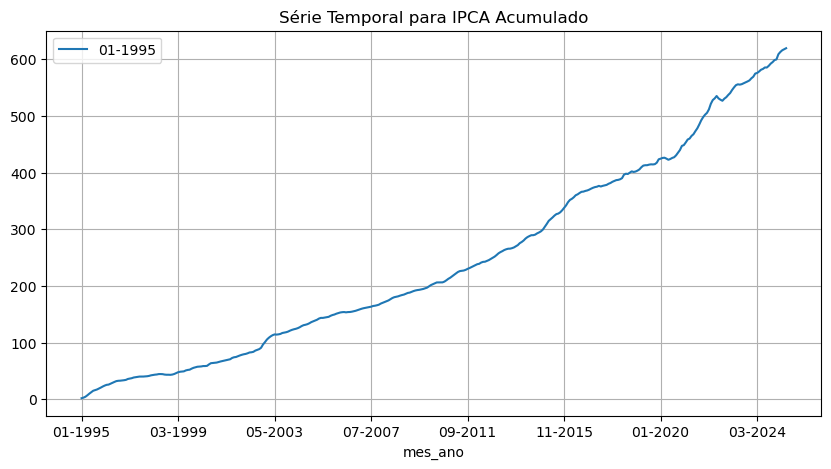

O IPCA acumulado do período foi de 619.47%


In [21]:
df_plot_ipca_acum = df.copy()

df_plot_ipca_acum = df_plot_ipca_acum.set_index('mes_ano')

df_plot_ipca_acum = (df_plot_ipca_acum.iloc[:, 2:3] - 1)*100

display(df_plot_ipca_acum)

df_plot_ipca_acum.plot(title='Série Temporal para IPCA Acumulado', figsize=(10, 5))
plt.grid(True)
plt.show()

########################

ipca_acum_per = df_acum['ipca_acumulado'][0]
ipca_acum_per = round(ipca_acum_per - 1, 4) * 100
ipca_acum_per = f"{ipca_acum_per:.2f}%"

print(f"O IPCA acumulado do período foi de {ipca_acum_per}")

In [ ]:
pib_mensal = pd.read_excel('pib_mensal.xls')

pib_mensal = pib_mensal.rename(columns = {'PIB - R$ (milhões)  - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_PIB12 - ':'PIB'})

pib_mensal['mes_ano'] = pib_mensal['Data'].map(lambda x: str(x)[5:7]) + '-' + pib_mensal['Data'].map(lambda x: str(x)[:4])

pib_mensal = pib_mensal.tail(366)

pib_mensal_real = pd.merge(pib_mensal, df_acum, right_on= 'mes_ano', left_on='mes_ano', how = 'left')

pib_mensal_real['PIB_REAL'] = pib_mensal_real['PIB'] * pib_mensal_real['ipca_acumulado']

pib_mensal_real = pib_mensal_real.set_index('mes_ano')

pib_mensal_real

,Data,PIB,ipca_acumulado,PIB_REAL
mes_ano,,,,
01-1995,1995.01,47028.6,7.194654,3.383545e+05
02-1995,1995.02,49954.5,7.074389,3.533976e+05
03-1995,1995.03,60024.3,7.002959,4.203477e+05
04-1995,1995.04,57789.5,6.896070,3.985204e+05
05-1995,1995.05,56350.5,6.732471,3.793781e+05
...,...,...,...,...
02-2025,2025.02,993590.8,1.028276,1.021686e+06
03-2025,2025.03,1061741.3,1.014980,1.077646e+06
04-2025,2025.04,1064792.5,1.009328,1.074725e+06


In [14]:
print(pib_mensal_real.info())

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 01-1995 to 06-2025
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data            366 non-null    float64
 1   PIB             366 non-null    float64
 2   ipca_acumulado  336 non-null    float64
 3   PIB_REAL        336 non-null    float64
dtypes: float64(4)
memory usage: 14.3+ KB
None


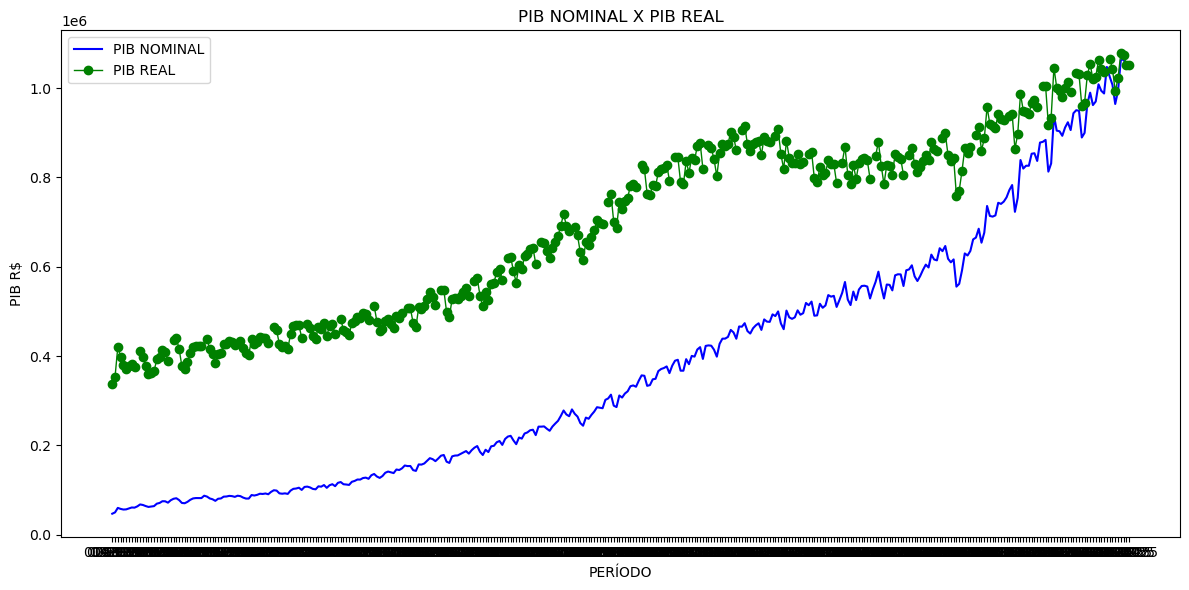

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(pib_mensal_real.index, pib_mensal_real['PIB'], label='PIB NOMINAL', color='blue')
plt.plot(pib_mensal_real.index, pib_mensal_real['PIB_REAL'], label='PIB REAL', color='green', marker='o', linewidth=1)

# Estilizando o gráfico
plt.title("PIB NOMINAL X PIB REAL")
plt.xlabel("PERÍODO")
plt.ylabel("PIB R$")
plt.legend()
#plt.xticks(rotation=10)
plt.tight_layout()
plt.show()